In [0]:
import cv2
import numpy as np
import imutils

from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
from skimage import io
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def url_to_image(url):
  print("downloading %s" % (url))
  return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

downloading https://github.com/mdavydov/ComputerVisionCourse/raw/master/tasks/count/count1.jpg


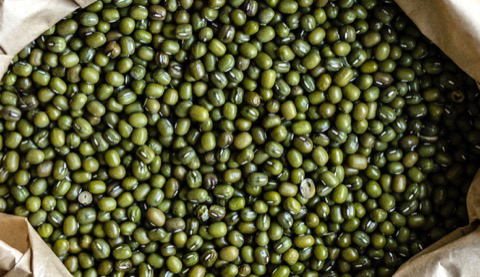

In [5]:
url_1 = "https://github.com/mdavydov/ComputerVisionCourse/raw/master/tasks/count/count1.jpg"

img_1 = url_to_image(url_1)
cv2_imshow(img_1)

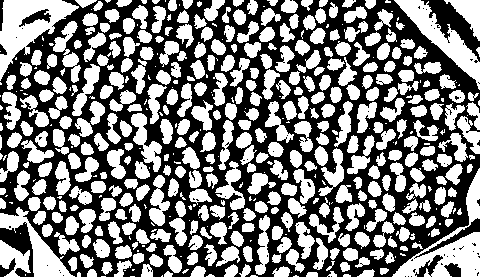

In [77]:
grayscaled_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
threshold_1 = cv2.adaptiveThreshold(grayscaled_1, 255, 
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 55, 5)

cv2_imshow(threshold_1)

[INFO] 505 unique contours found


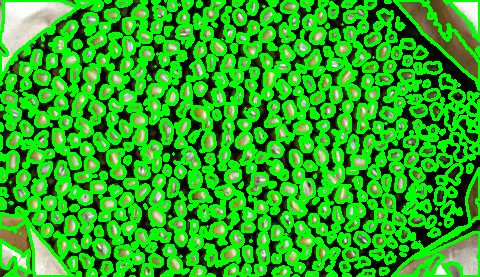

In [78]:
cnts = cv2.findContours(threshold_1.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print(f"[INFO] {len(cnts)} unique contours found")

image = img_1.copy()

for cnt in cnts:
	cv2.drawContours(image, [cnt], -1, (0, 255, 0), 2)
 
cv2_imshow(image)

downloading https://github.com/mdavydov/ComputerVisionCourse/raw/master/tasks/count/count2.jpg


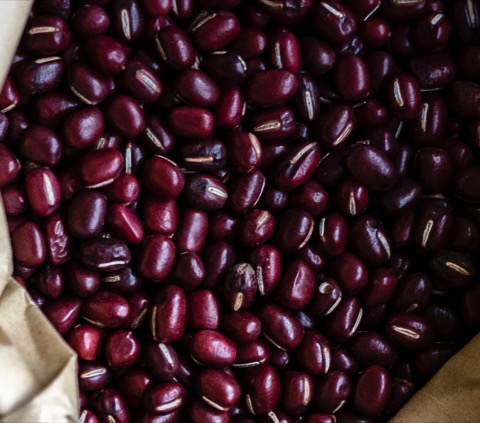

In [2]:
url_2 = "https://github.com/mdavydov/ComputerVisionCourse/raw/master/tasks/count/count2.jpg"

img_2 = url_to_image(url_2)
cv2_imshow(img_2)

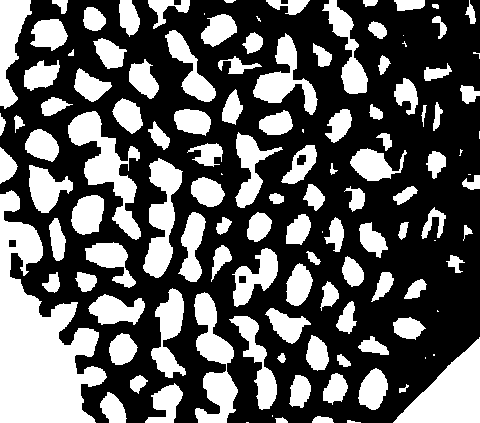

In [34]:
grayscaled_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
threshold_2 = cv2.threshold(grayscaled_2, 10, 255, cv2.THRESH_BINARY)[1]
kernel = np.ones((7, 7), np.uint8)
erosion = cv2.erode(threshold_2,kernel,iterations = 1)
cv2_imshow(erosion)

[INFO] 124 unique contours found


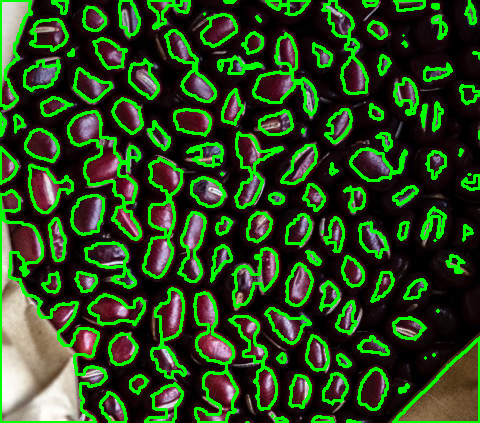

In [35]:
cnts = cv2.findContours(erosion.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print(f"[INFO] {len(cnts)} unique contours found")

image = img_2.copy()

for cnt in cnts:
	cv2.drawContours(image, [cnt], -1, (0, 255, 0), 2)
 
cv2_imshow(image)

[INFO] 109 unique segments found


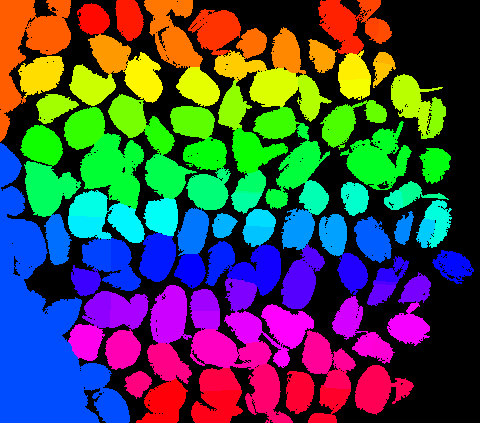

In [206]:
D = ndimage.distance_transform_edt(threshold_2)
localMax = peak_local_max(D, indices=False, min_distance=20, labels=threshold_2)

markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=threshold_2)
print(f"[INFO] {len(np.unique(labels))} unique segments found")

label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue==0] = 0

cv2_imshow(labeled_img)

image = img_2

for label in np.unique(labels):
	if label == 0:
		continue

	mask = np.zeros(grayscaled_2.shape, dtype="uint8")
	mask[labels == label] = 255 

	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)
 
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
 
cv2_imshow(image)

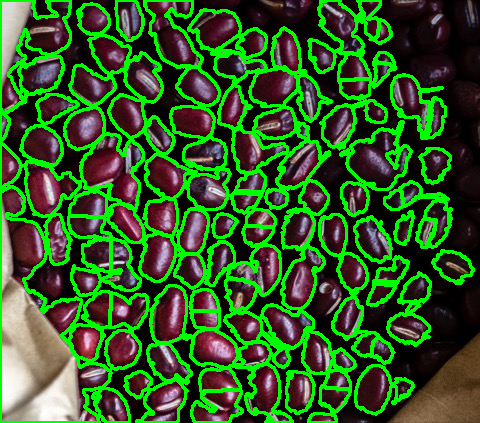

downloading https://github.com/mdavydov/ComputerVisionCourse/raw/master/tasks/count/count3.jpg


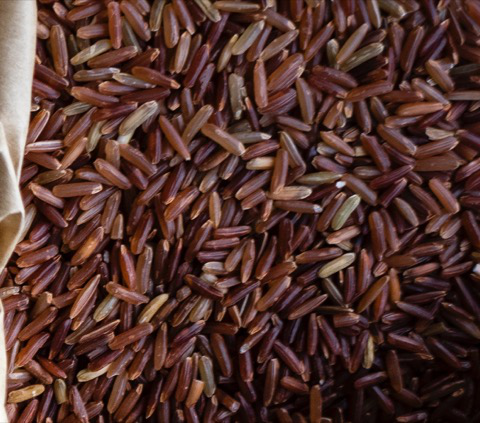

In [37]:
url_3 = "https://github.com/mdavydov/ComputerVisionCourse/raw/master/tasks/count/count3.jpg"

img_3 = url_to_image(url_3)
cv2_imshow(img_3)

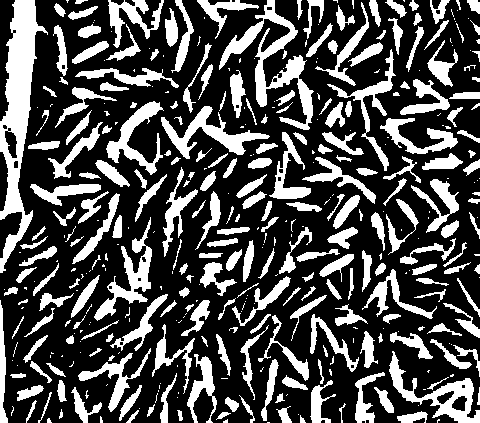

In [41]:
grayscaled_3 = cv2.cvtColor(img_3, cv2.COLOR_BGR2GRAY)
threshold_3 = cv2.adaptiveThreshold(grayscaled_3, 255, 
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 95, 5)

kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(threshold_3, kernel, iterations = 1)
cv2_imshow(erosion)

[INFO] 409 unique contours found


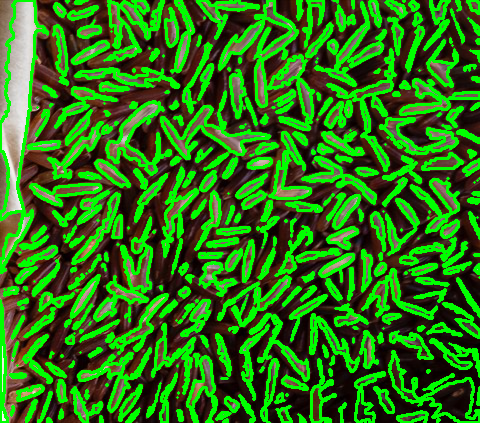

In [42]:
cnts = cv2.findContours(erosion.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print(f"[INFO] {len(cnts)} unique contours found")

image = img_3.copy()

for cnt in cnts:
	cv2.drawContours(image, [cnt], -1, (0, 255, 0), 2)
 
cv2_imshow(image)

downloading https://github.com/mdavydov/ComputerVisionCourse/raw/master/tasks/count/count4.jpg


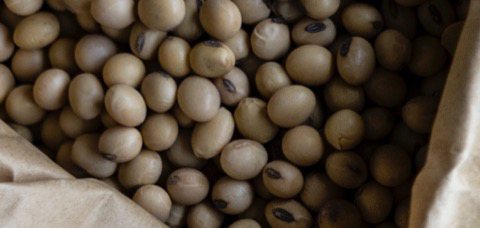

In [44]:
url_4 = "https://github.com/mdavydov/ComputerVisionCourse/raw/master/tasks/count/count4.jpg"

img_4 = url_to_image(url_4)
cv2_imshow(img_4)

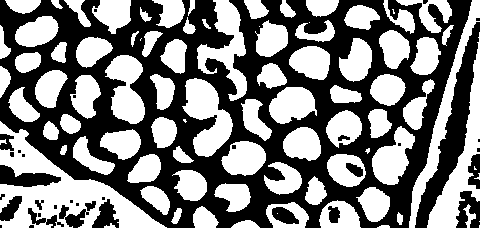

In [47]:
grayscaled_4 = cv2.cvtColor(img_4, cv2.COLOR_BGR2GRAY)
threshold_4 = cv2.adaptiveThreshold(grayscaled_4, 255, 
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 55, 5)

kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(threshold_4, kernel, iterations = 1)
cv2_imshow(erosion)

[INFO] 87 unique contours found


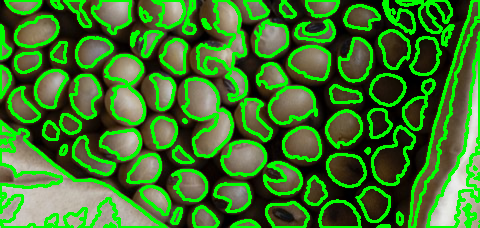

In [48]:
cnts = cv2.findContours(erosion.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print(f"[INFO] {len(cnts)} unique contours found")

image = img_4.copy()

for cnt in cnts:
	cv2.drawContours(image, [cnt], -1, (0, 255, 0), 2)
 
cv2_imshow(image)

downloading https://github.com/mdavydov/ComputerVisionCourse/raw/master/tasks/count/count5.jpg


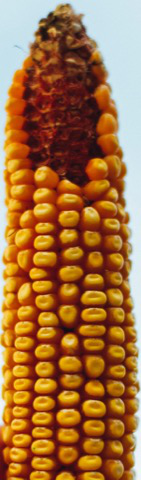

In [264]:
url_5 = "https://github.com/mdavydov/ComputerVisionCourse/raw/master/tasks/count/count5.jpg"

img_5 = url_to_image(url_5)
cv2_imshow(img_5)

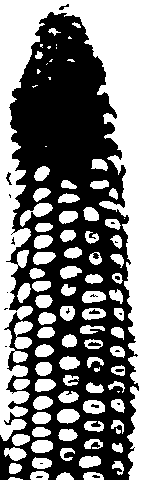

In [276]:
grayscaled_5 = cv2.cvtColor(img_5, cv2.COLOR_BGR2GRAY)
threshold_5 = cv2.threshold(grayscaled_5, 120, 255, cv2.THRESH_BINARY)[1]

cv2_imshow(threshold_5)

[INFO] 95 unique contours found


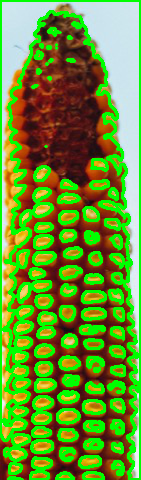

In [277]:
cnts = cv2.findContours(threshold_5.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print(f"[INFO] {len(cnts)} unique contours found")

image = img_5.copy()

for cnt in cnts:
	cv2.drawContours(image, [cnt], -1, (0, 255, 0), 2)
 
cv2_imshow(image)

downloading https://github.com/mdavydov/ComputerVisionCourse/raw/master/tasks/count/count6.jpg


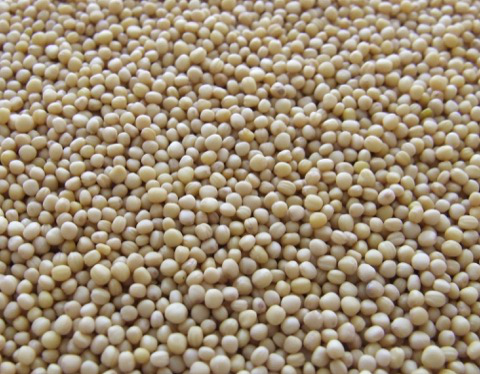

In [49]:
url_6 = "https://github.com/mdavydov/ComputerVisionCourse/raw/master/tasks/count/count6.jpg"

img_6 = url_to_image(url_6)
cv2_imshow(img_6)

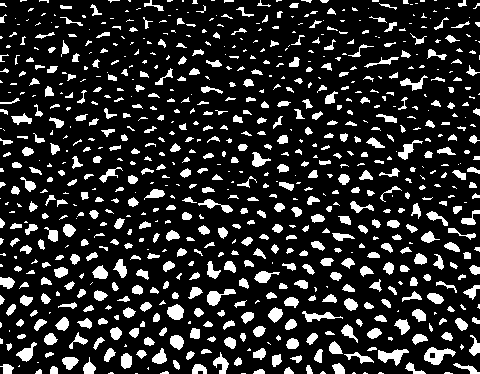

In [52]:
grayscaled_6 = cv2.cvtColor(img_6, cv2.COLOR_BGR2GRAY)
threshold_6 = cv2.adaptiveThreshold(grayscaled_6, 255, 
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 35, 5)

kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(threshold_6, kernel, iterations = 1)
cv2_imshow(erosion)

[INFO] 802 unique contours found


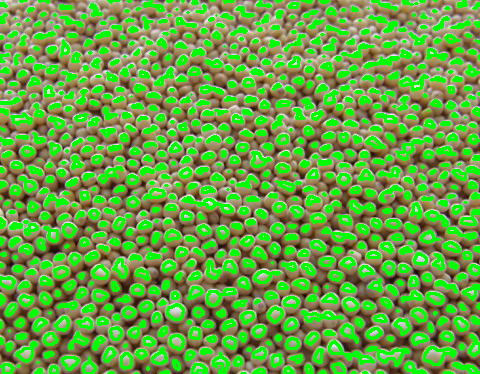

In [53]:
cnts = cv2.findContours(erosion.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print(f"[INFO] {len(cnts)} unique contours found")

image = img_6.copy()

for cnt in cnts:
	cv2.drawContours(image, [cnt], -1, (0, 255, 0), 2)
 
cv2_imshow(image)

downloading https://github.com/mdavydov/ComputerVisionCourse/raw/master/tasks/count/count7.jpg


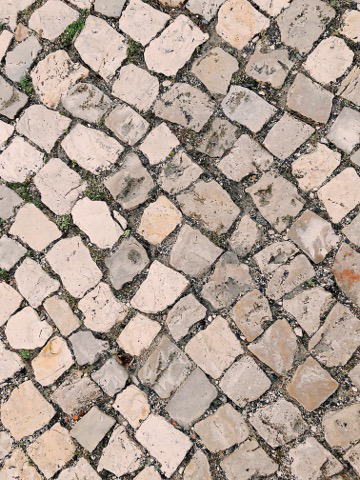

In [54]:
url_7 = "https://github.com/mdavydov/ComputerVisionCourse/raw/master/tasks/count/count7.jpg"
img_7 = url_to_image(url_7)

cv2_imshow(img_7)

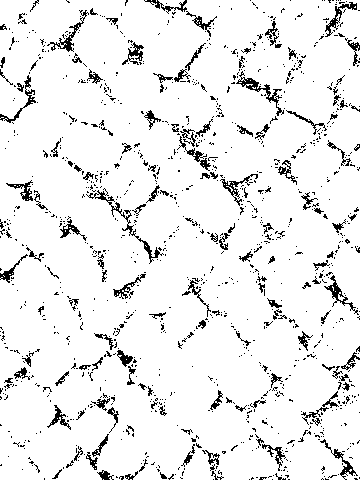

In [61]:
grayscaled_7 = cv2.cvtColor(img_7, cv2.COLOR_BGR2GRAY)
threshold_7 = cv2.threshold(grayscaled_7, 80, 255, cv2.THRESH_BINARY)[1]

cv2_imshow(threshold_7)

[INFO] 66 unique segments found


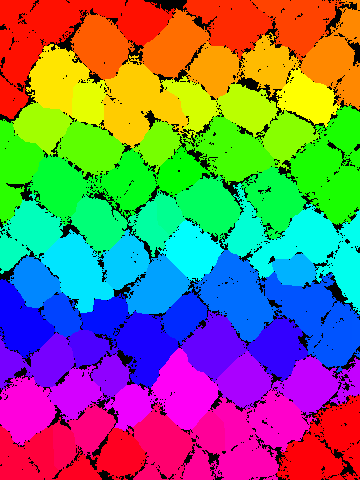

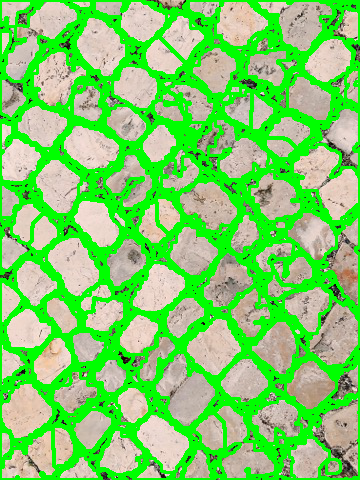

In [62]:
D = ndimage.distance_transform_edt(threshold_7)
localMax = peak_local_max(D, indices=False, min_distance=20, labels=threshold_7)

markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=threshold_7)
print(f"[INFO] {len(np.unique(labels))} unique segments found")

label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue==0] = 0

cv2_imshow(labeled_img)

image = img_7

for label in np.unique(labels):
	if label == 0:
		continue

	mask = np.zeros(grayscaled_7.shape, dtype="uint8")
	mask[labels == label] = 255 

	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)
 
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
 
cv2_imshow(image)

downloading https://github.com/mdavydov/ComputerVisionCourse/raw/master/tasks/count/count8.jpg


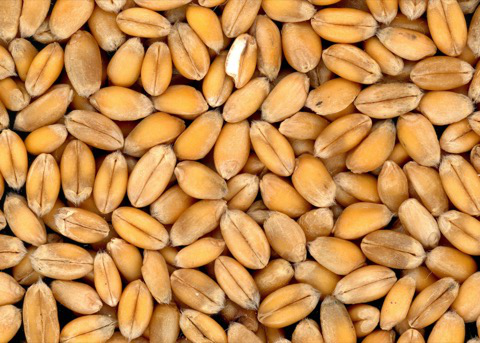

In [64]:
url_8 = "https://github.com/mdavydov/ComputerVisionCourse/raw/master/tasks/count/count8.jpg"
img_8 = url_to_image(url_8)

cv2_imshow(img_8)

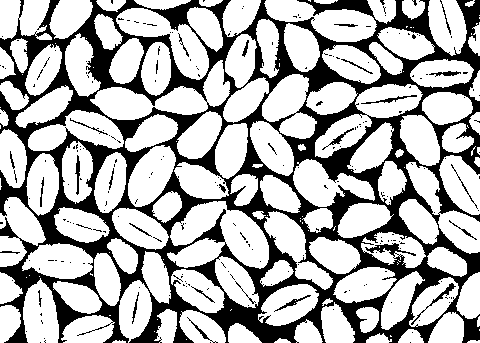

In [72]:
grayscaled_8 = cv2.cvtColor(img_8, cv2.COLOR_BGR2GRAY)
threshold_8 = cv2.threshold(grayscaled_8, 140, 255, cv2.THRESH_BINARY)[1]

cv2_imshow(threshold_8)

[INFO] 156 unique contours found


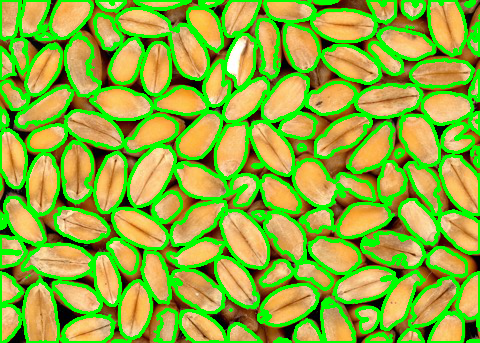

In [73]:
cnts = cv2.findContours(threshold_8.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print(f"[INFO] {len(cnts)} unique contours found")

image = img_8.copy()

for cnt in cnts:
	cv2.drawContours(image, [cnt], -1, (0, 255, 0), 2)
 
cv2_imshow(image)

downloading https://github.com/mdavydov/ComputerVisionCourse/raw/master/tasks/count/count9.jpg


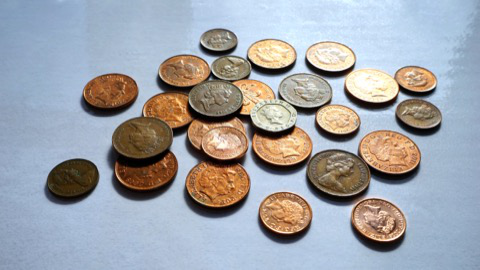

In [74]:
url_9 = "https://github.com/mdavydov/ComputerVisionCourse/raw/master/tasks/count/count9.jpg"
img_9 = url_to_image(url_9)

cv2_imshow(img_9)

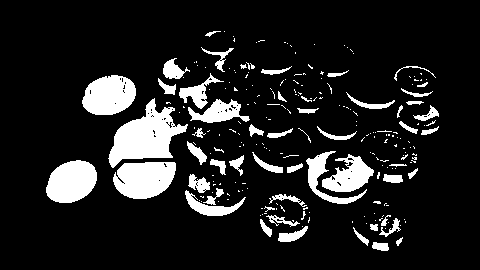

In [80]:
grayscaled_9 = cv2.cvtColor(img_9, cv2.COLOR_BGR2GRAY)
inverted_9 = cv2.bitwise_not(grayscaled_9)
threshold_9 = cv2.threshold(inverted_9, 115, 255, cv2.THRESH_BINARY)[1]
 
cv2_imshow(threshold_9)

[INFO] 44 unique segments found


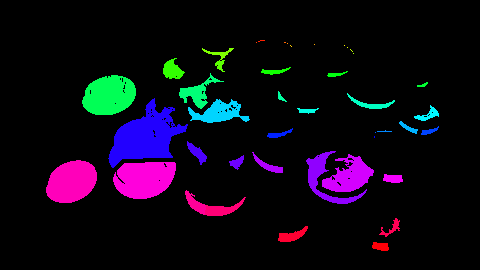

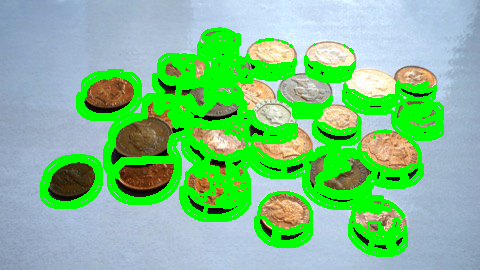

In [81]:
D = ndimage.distance_transform_edt(threshold_9)
localMax = peak_local_max(D, indices=False, min_distance=20, labels=threshold_9)

markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=threshold_9)
print(f"[INFO] {len(np.unique(labels))} unique segments found")

label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue==0] = 0

cv2_imshow(labeled_img)

image = img_9

for label in np.unique(labels):
	if label == 0:
		continue

	mask = np.zeros(grayscaled_9.shape, dtype="uint8")
	mask[labels == label] = 255 

	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)
 
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
 
cv2_imshow(image)

downloading https://github.com/mdavydov/ComputerVisionCourse/raw/master/tasks/count/count10.jpg


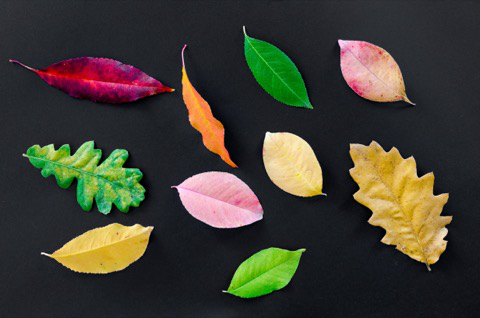

In [82]:
url_10 = "https://github.com/mdavydov/ComputerVisionCourse/raw/master/tasks/count/count10.jpg"
img_10 = url_to_image(url_10)

cv2_imshow(img_10)

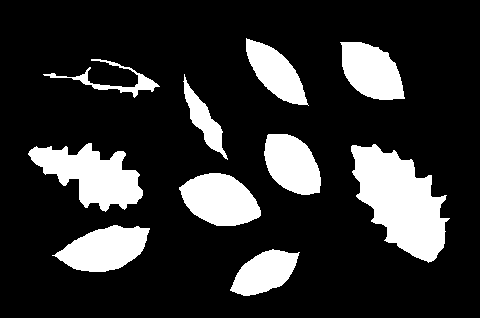

In [116]:
grayscaled_10 = cv2.cvtColor(img_10, cv2.COLOR_BGR2GRAY)
threshold_10 = cv2.threshold(grayscaled_10, 70, 255, cv2.THRESH_BINARY)[1]

kernel = np.ones((3, 3),np.uint8)
closing = cv2.morphologyEx(threshold_10, cv2.MORPH_CLOSE, kernel)
erosion = cv2.erode(closing, kernel, iterations = 3)
cv2_imshow(erosion)

[INFO] 10 unique contours found


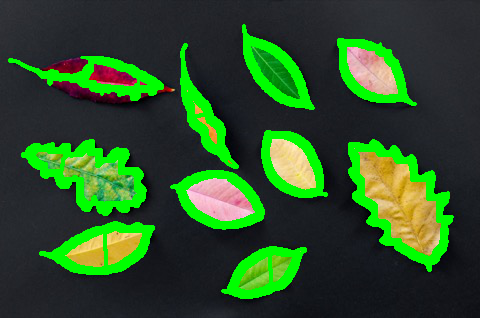

In [118]:
cnts = cv2.findContours(erosion.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print(f"[INFO] {len(cnts)} unique contours found")

image = img_10.copy()

for cnt in cnts:
	cv2.drawContours(image, [cnt], -1, (0, 255, 0), 2)
 
cv2_imshow(image)

downloading https://github.com/mdavydov/ComputerVisionCourse/raw/master/tasks/count/count11.jpg


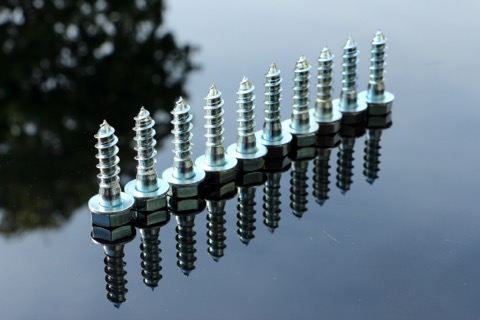

In [119]:
url_11 = "https://github.com/mdavydov/ComputerVisionCourse/raw/master/tasks/count/count11.jpg"
img_11 = url_to_image(url_11)

cv2_imshow(img_11)

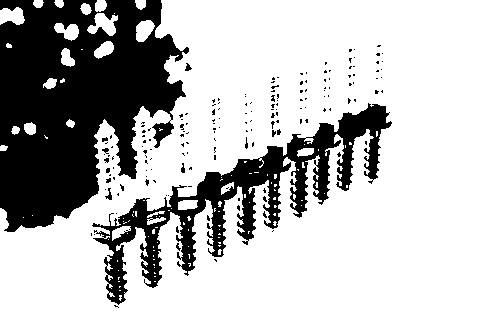

In [129]:
grayscaled_11 = cv2.cvtColor(img_11, cv2.COLOR_BGR2GRAY)
threshold_11 = cv2.threshold(grayscaled_11, 50, 255, cv2.THRESH_BINARY)[1]
 
cv2_imshow(threshold_11)

[INFO] 34 unique segments found


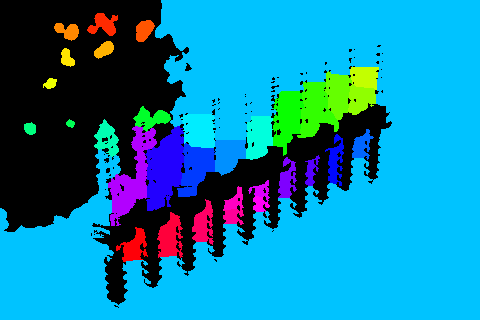

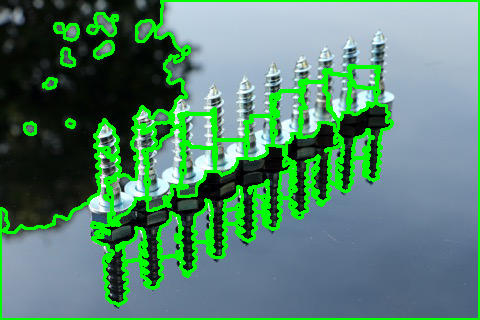

In [523]:
D = ndimage.distance_transform_edt(threshold_11)
localMax = peak_local_max(D, indices=False, min_distance=20, labels=threshold_11)

markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=threshold_11)
print(f"[INFO] {len(np.unique(labels))} unique segments found")

label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue==0] = 0

cv2_imshow(labeled_img)

image = img_11

for label in np.unique(labels):
	if label == 0:
		continue

	mask = np.zeros(grayscaled_11.shape, dtype="uint8")
	mask[labels == label] = 255 

	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)
 
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
 
cv2_imshow(image)

downloading https://github.com/mdavydov/ComputerVisionCourse/raw/master/tasks/count/count12.jpg


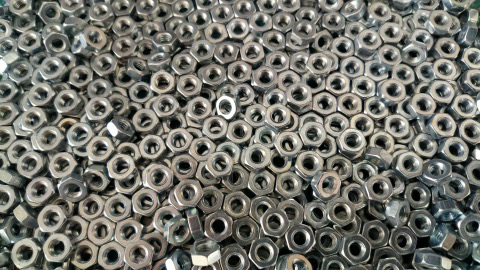

In [143]:
url_12 = "https://github.com/mdavydov/ComputerVisionCourse/raw/master/tasks/count/count12.jpg"
img_12 = url_to_image(url_12)

cv2_imshow(img_12)

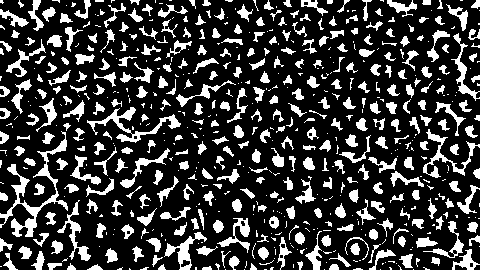

In [144]:
grayscaled_12 = cv2.cvtColor(img_12, cv2.COLOR_BGR2GRAY)
inverted_12 = cv2.bitwise_not(grayscaled_12)
threshold_12 = cv2.adaptiveThreshold(inverted_12, 255, 
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 55, 5)

kernel = np.ones((3, 3),np.uint8)
erosion = cv2.erode(threshold_12, kernel, iterations = 1)
 
cv2_imshow(erosion)

[INFO] 324 unique segments found


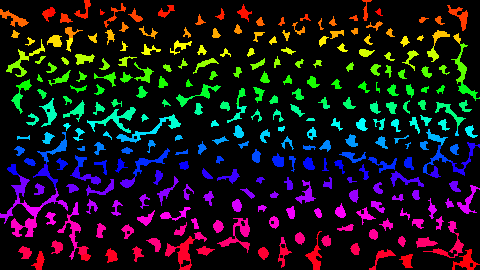

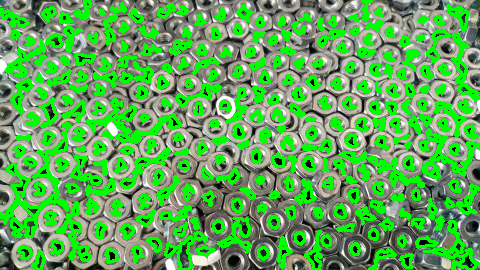

In [145]:
D = ndimage.distance_transform_edt(erosion)
localMax = peak_local_max(D, indices=False, min_distance=10, labels=erosion)

markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=erosion)
print(f"[INFO] {len(np.unique(labels))} unique segments found")

label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue==0] = 0

cv2_imshow(labeled_img)

image = img_12

for label in np.unique(labels):
	if label == 0:
		continue

	mask = np.zeros(grayscaled_12.shape, dtype="uint8")
	mask[labels == label] = 255 

	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)
 
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
 
cv2_imshow(image)